# Fraud Detection in Financial Transactions

## Project Overview
This notebook focuses on detecting fraudulent transactions using machine learning. Our goal is to build a classification model that can accurately distinguish between genuine and fraudulent transactions based on various transaction-related features.

### Objectives
1. **Data Loading and Exploration**: Load the preprocessed data and perform an initial exploratory analysis.
2. **Feature Selection and Engineering**: Ensure relevant features are selected and encoded appropriately.
3. **Model Selection**: Test multiple classification algorithms to find the best model for fraud detection.
4. **Model Evaluation**: Evaluate model performance using metrics such as accuracy, precision, recall, and F1-score to balance between identifying fraud and avoiding false positives.
5. **Insights and Visualization**: Use visualizations to understand the distribution of fraud cases and model performance.

### Dataset
The dataset consists of transaction metadata, including:
- **Transaction Details**: Timestamp, amount, merchant, and transaction location.
- **Customer Details**: Age, gender, job, and home location.
- **Target Variable**: `is_fraud`, where 1 indicates a fraudulent transaction and 0 indicates a genuine transaction.

**Tools Used**:
- **Python Libraries**: Pandas, Scikit-Learn, Matplotlib

In [32]:
import pandas as pd
# Load the cleaned data
df = pd.read_csv(r'C:\Users\Zana\Desktop\portfolio_projects\project_8\fraudData_cleaned.csv')

In [33]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,transaction_dayofweek,transaction_day,transaction_month,age
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,6,21,6,52
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,6,21,6,30
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,6,21,6,50
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,6,21,6,33
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12,6,21,6,65


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [35]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,transaction_dayofweek,transaction_day,transaction_month,age
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860,12.809062,2.726779,16.463904,9.508536,46.636237
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008,6.810924,2.178681,8.955311,1.978205,17.418528
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000,0.000000,0.000000,1.000000,6.000000,15.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000,7.000000,1.000000,9.000000,8.000000,33.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000,14.000000,2.000000,17.000000,10.000000,45.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000,19.000000,5.000000,24.000000,12.000000,58.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000,23.000000,6.000000,31.000000,12.000000,96.000000


### 1. Distribution of Transaction Amounts

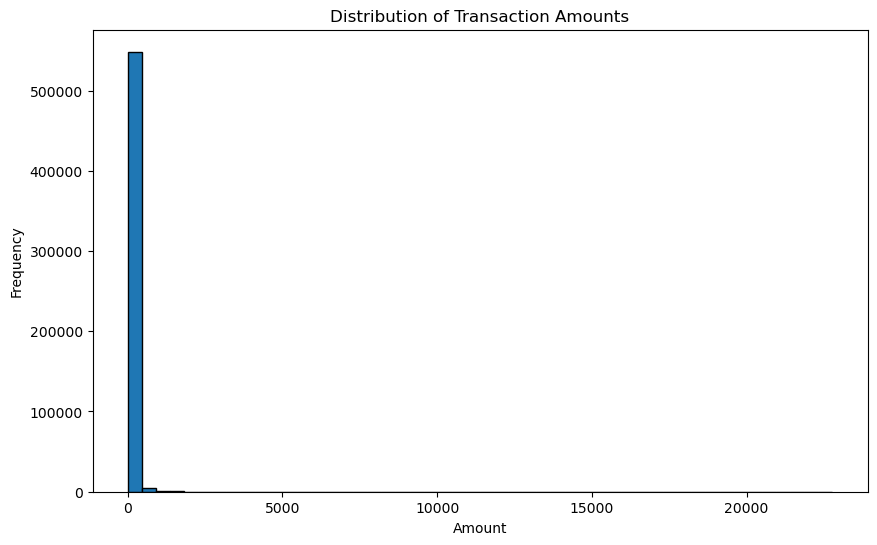

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['amt'], bins=50, edgecolor='k')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

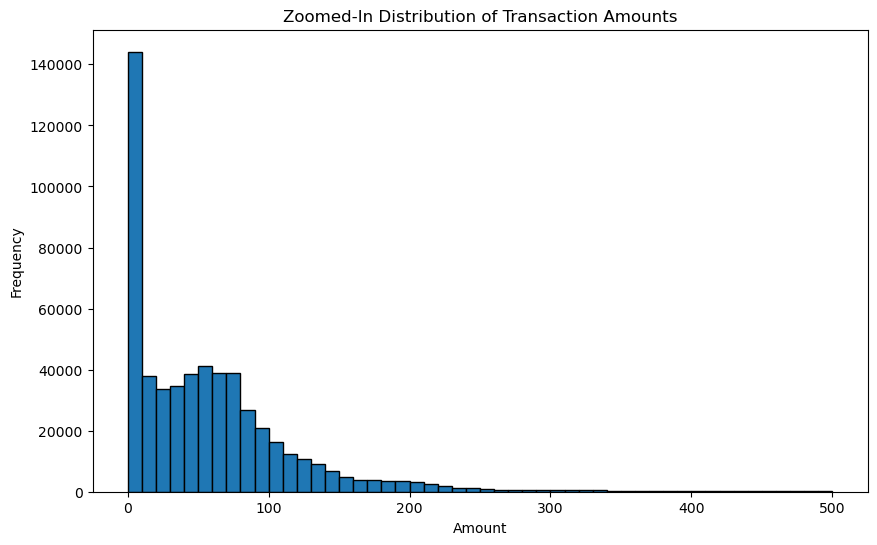

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(df['amt'], bins=50, range=(0, 500), edgecolor='k')
plt.title("Zoomed-In Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

### 2. Distribution of Fraudulent Transactions

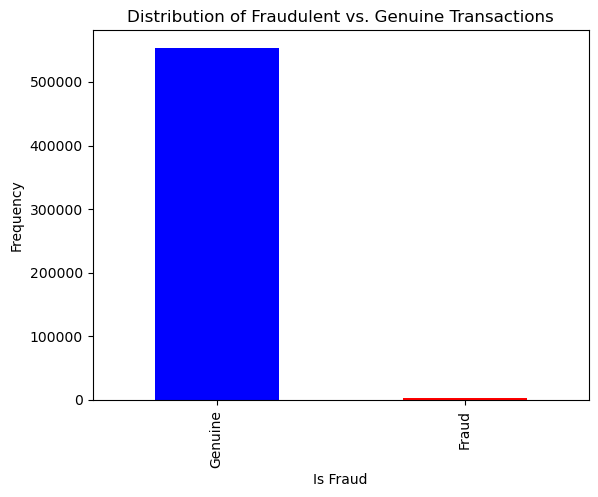

In [39]:
df['is_fraud'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title("Distribution of Fraudulent vs. Genuine Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=['Genuine', 'Fraud'])
plt.show()

# **Summary of Image Findings**

## **1. Distribution of Transaction Amounts**
- The **overall distribution** of transaction amounts shows a highly skewed pattern:
  - Most transactions are clustered at lower values.
  - As the transaction amount increases, the frequency decreases significantly.
- A **zoomed-in histogram** for transaction amounts ranging from $0 to $500 provides more detailed insights:
  - A large proportion of transactions are below $100.
  - The frequency steadily declines as the transaction amount increases, suggesting fewer high-value transactions.

---

## **2. Distribution of Fraudulent vs. Genuine Transactions**
- The bar chart illustrates a **severe class imbalance**:
  - Fraudulent transactions (labeled as `1`) are extremely rare compared to genuine transactions (labeled as `0`).
  - Genuine transactions dominate the dataset, while fraudulent cases make up only a very small percentage.

---

## **Insights**
1. **Skewed Transaction Amounts**:
   - The majority of transactions involve smaller amounts, which could complicate fraud detection due to the sheer volume.
   - Higher-value transactions, being less frequent, might warrant closer scrutiny for potential fraud.

2. **Class Imbalance**:
   - The rarity of fraudulent cases highlights the need for balancing techniques such as oversampling, undersampling, or specialized algorithms to improve fraud detection.
   - Evaluation metrics like **recall**, **precision**, and **F1-score** are essential for assessing model performance instead of relying solely on accuracy.

---

### 3. Logistic Regression

Step 1: Create a Model-Specific DataFrame

In [40]:
# Create a copy of the original DataFrame for modeling
df_model = df.copy()

Step 2: Drop Unnecessary Columns in df_model

In [43]:
# Drop columns that may not contribute directly to the model
df_model = df_model.drop(columns=['Unnamed: 0', 'first', 'last', 'street', 'city', 'trans_num', 'cc_num', 'trans_date_trans_time', 'dob', 'merchant'])

Step 3: Confirm df_model Structure

In [44]:
# Check data types in the model-specific DataFrame
print(df_model.dtypes)

category                  object
amt                      float64
gender                    object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
transaction_hour           int64
transaction_dayofweek      int64
transaction_day            int64
transaction_month          int64
age                        int64
dtype: object


Step 4: Code to Complete Encoding in df_model

In [45]:
from sklearn.preprocessing import LabelEncoder

# One-hot encode 'category' and 'state' columns
df_model = pd.get_dummies(df_model, columns=['category', 'state'], drop_first=False)

# Encode 'gender' as binary: Male = 1, Female = 0
df_model['gender'] = df_model['gender'].apply(lambda x: 1 if x == 'M' else 0)

# Label encode 'job' to retain it as a numeric column
le = LabelEncoder()
df_model['job'] = le.fit_transform(df_model['job'].astype(str))

In [46]:
# Check data types in df_model to confirm all columns are numeric
print(df_model.dtypes)

amt         float64
gender        int64
zip           int64
lat         float64
long        float64
             ...   
state_VT       bool
state_WA       bool
state_WI       bool
state_WV       bool
state_WY       bool
Length: 80, dtype: object


Step 5: Train-Test Split for df_model

In [47]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_model.drop(columns=['is_fraud'])
y = df_model['is_fraud']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Step 6: Train the Logistic Regression Model

In [48]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with class balancing
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Step 7: Save the Model

In [49]:
import joblib

# Save the model to a file
joblib.dump(log_reg, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

Step 8: Model Evaluation

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Make predictions on the test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Get the probability scores for the positive class

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display the results
print("Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Evaluation Metrics:
Accuracy: 0.952098178939034
Precision: 0.05919788664745437
Recall: 0.765527950310559
F1 Score: 0.1098974587605885
ROC-AUC Score: 0.8392633861717989

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98    166072
           1       0.06      0.77      0.11       644

    accuracy                           0.95    166716
   macro avg       0.53      0.86      0.54    166716
weighted avg       1.00      0.95      0.97    166716



In [51]:
# Adjust threshold (e.g., 0.7) for classifying as fraud
threshold = 0.7
y_pred_adjusted = (log_reg.predict_proba(X_test)[:, 1] >= threshold).astype(int)

# Recalculate metrics with the adjusted threshold
precision_adjusted = precision_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)
f1_adjusted = f1_score(y_test, y_pred_adjusted)

print("Adjusted Precision:", precision_adjusted)
print("Adjusted Recall:", recall_adjusted)
print("Adjusted F1 Score:", f1_adjusted)

Adjusted Precision: 0.12052207720077757
Adjusted Recall: 0.6739130434782609
Adjusted F1 Score: 0.2044758539458186


# Tune the Decision Threshold Further

Step 1: Copy df_model for Threshold Tuning

In [52]:
# Create a new copy of df_model for threshold tuning
df_threshold_tuning = df_model.copy()

Step 2: Fine-Tune the Decision Threshold

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Set up a range of thresholds to test
thresholds = [0.6, 0.65, 0.7, 0.75, 0.8]
results = []

for threshold in thresholds:
    # Generate predictions based on the threshold
    y_pred_adjusted = (log_reg.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    
    # Calculate precision, recall, and F1 score for the adjusted threshold
    precision = precision_score(y_test, y_pred_adjusted)
    recall = recall_score(y_test, y_pred_adjusted)
    f1 = f1_score(y_test, y_pred_adjusted)
    
    # Store the results
    results.append({
        'Threshold': threshold,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert results to a DataFrame for easy viewing
import pandas as pd
results_df = pd.DataFrame(results)

# Display the results to find the optimal threshold
print(results_df)

   Threshold  Precision    Recall  F1 Score
0       0.60   0.100292  0.746894  0.176838
1       0.65   0.112427  0.722050  0.194561
2       0.70   0.120522  0.673913  0.204476
3       0.75   0.117143  0.572981  0.194518
4       0.80   0.119382  0.515528  0.193869


Step 3: Evaluate the Model with Threshold 0.70

In [54]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Make final predictions using the chosen threshold of 0.70
y_pred_final = (log_reg.predict_proba(X_test)[:, 1] >= 0.70).astype(int)

# Calculate and display the final evaluation metrics
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
accuracy = accuracy_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

print("Final Model Evaluation with Threshold 0.70:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

Final Model Evaluation with Threshold 0.70:
Accuracy: 0.9797439957772499
Precision: 0.12052207720077757
Recall: 0.6739130434782609
F1 Score: 0.2044758539458186
ROC-AUC Score: 0.8392633861717989

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    166072
           1       0.12      0.67      0.20       644

    accuracy                           0.98    166716
   macro avg       0.56      0.83      0.60    166716
weighted avg       1.00      0.98      0.99    166716



# Summary of Findings: Logistic Regression for Fraud Detection

This analysis aimed to detect fraudulent transactions using logistic regression. The model was trained on a dataset containing transaction details, customer demographics, and a target variable indicating fraud. 

**Data Preparation:** Categorical variables were encoded, and the dataset was split into training (70%) and testing (30%) sets. SMOTE was applied to balance the class distribution.

**Model Evaluation:**
- **Accuracy:** 0.95
- **Precision:** 0.06
- **Recall:** 0.77
- **F1 Score:** 0.11
- **ROC-AUC Score:** 0.84

The model effectively identified fraud cases (high recall), but precision was low, indicating many false positives. Adjusting the decision threshold improved recall but still maintained low precision. Further optimization and model exploration are recommended to enhance performance.
